In [1]:
from __future__ import annotations
import deepscratch
from deepscratch.typing import PyTree

from deepscratch.dataset.vision import MNISTDataset
from deepscratch.dataset.base import DataLoader
from deepscratch.models.base import LinearBlock, Sequential
from deepscratch.models.vision.cnn import ConvBlock
from deepscratch.initialisers import Gaussian, Zeros
from deepscratch.activations import ReLU, Softmax, Activation
from deepscratch.optimisers import SGD, Adam
from deepscratch.losses import CrossEntropy, Accuracy
from deepscratch.transformations import Reshape

import jax.numpy as jnp

import matplotlib.pyplot as plt

deepscratch.dataset.vision
deepscratch.dataset.base
deepscratch.models.base
deepscratch.initialisers
deepscratch.activations
deepscratch.dataset.canonical
deepscratch.optimisers
deepscratch.losses
deepscratch.transformations
deepscratch.models.vision.cnn


In [2]:
BATCH_SIZE = 256
ds = MNISTDataset(ohe=True)
dl = DataLoader(ds, BATCH_SIZE, shuffle=True, num_workers=16, drop_last=True)

In [3]:
optimiser = SGD(Adam, dl)

ann = Sequential([
    Reshape((BATCH_SIZE, -1)),
    LinearBlock(28*28*3, 256),
    ReLU(),
    LinearBlock(256, 64),
    ReLU(),
    LinearBlock(64, 10),
    Softmax()
])

In [5]:
ann.train(
    dl,
    CrossEntropy(),
    Adam,
    lr=1e-4,
    epochs=4
)

Iter: 656	Step: 2.7E-02	Loss: 5.805E-01


In [6]:
x_misclf = []
y_misclf = []
y_est_misclf = []
acc = 0

for batch in dl:
    x, y = batch
    y_est = ann(x).argmax(axis=1)
    y = y.argmax(axis=1)

    acc += (y_est == y).sum()
    x_misclf.append(x[y_est != y])
    y_est_misclf.append(y_est[y_est != y])
    y_misclf.append(y[y_est != y])

x_mis_clf = jnp.vstack(x_misclf)
y_est_misclf = jnp.hstack(y_est_misclf)
y_mis_clf = jnp.hstack(y_misclf)

print(f"Accuracy: {acc / len(ds):.3%}")

Accuracy: 83.790%


## Where did the model go wrong?

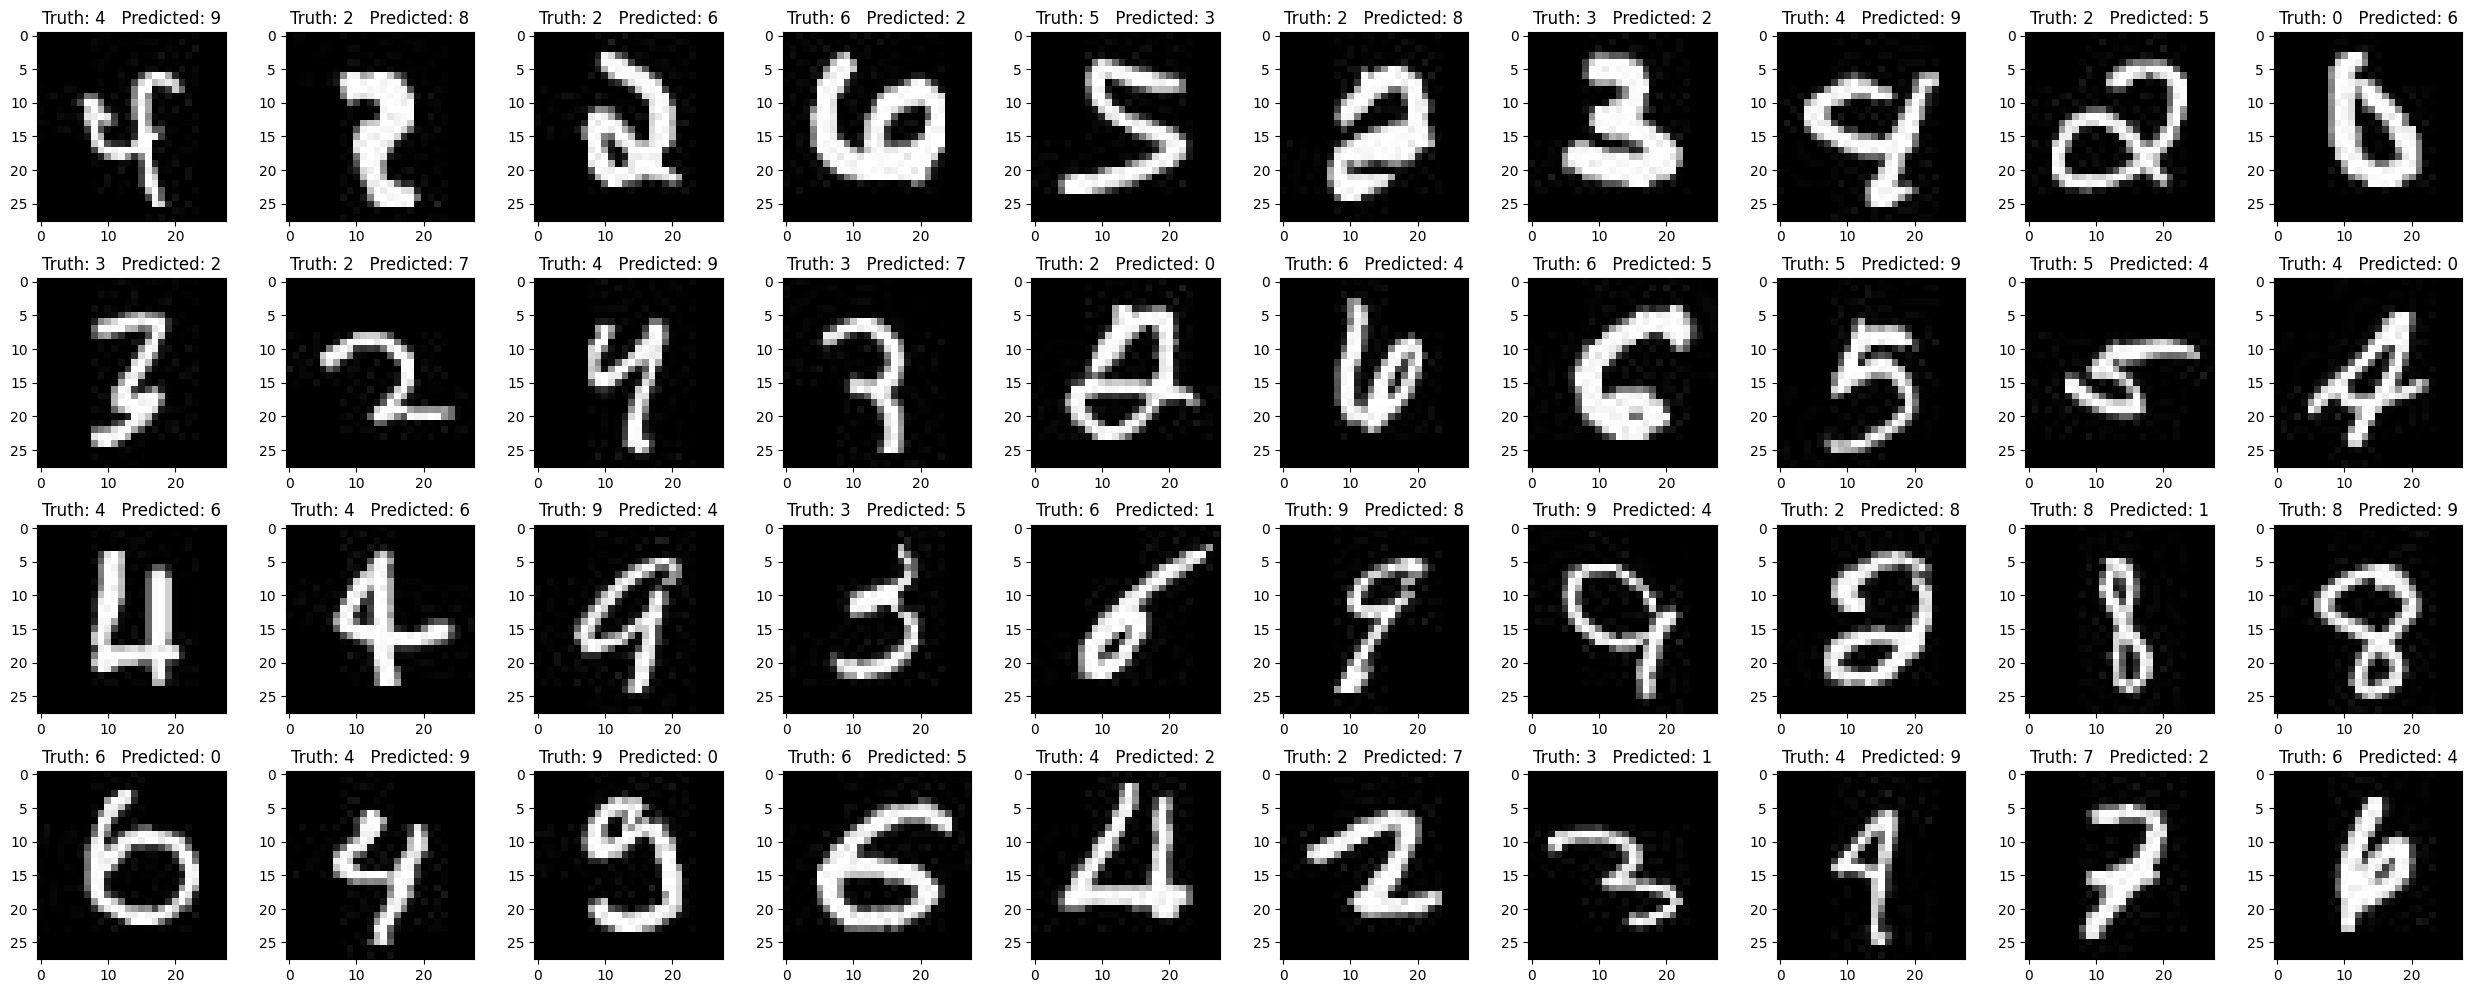

In [12]:
fig, axs = plt.subplots(4, 10, figsize=(25,10))

for xi, y_esti, yi, ax in zip(x_mis_clf, y_est_misclf, y_mis_clf, axs.flatten()):
    ax.imshow(xi)
    ax.set_title(f"Truth: {yi}   Predicted: {y_esti}")

fig.tight_layout()